### This notebook compares the accuracy of a logistic regression from scikit-learn vs keras (tensorflow)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_digits
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib notebook

In [3]:
data, labels = load_digits(n_class=10, return_X_y=True)
data.shape, labels.shape

((1797, 64), (1797,))

In [4]:
input_shape = data.shape[1]
n_classes = len(np.unique(labels))
n_classes

10

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.7, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1257, 64), (1257,), (540, 64), (540,))

### Test using scikit learn

In [48]:
lr = LogisticRegressionCV()
lr.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [49]:
pred_y = lr.predict(x_test)
print('Accuracy with scikit-learn LogisticRegressionCV = {:.4f}'.format(lr.score(x_test, y_test)))

Accuracy with scikit-learn LogisticRegressionCV = 0.9648


### Test using keras

In [7]:
def one_hot_encode(arr):
    if arr[0].dtype == np.int:
        return to_categorical(arr)
    
    # Labels must be encoded into numbers 
    classes, ids = np.unique(train_y, return_inverse=True)
    return to_categorical(ids)

In [8]:
y_train_ohe = one_hot_encode(y_train)
y_test_ohe = one_hot_encode(y_test)

In [38]:
model = Sequential()
model.add(Dense(input_shape * 4, input_shape=(input_shape,)))
model.add(Activation('sigmoid'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [39]:
callbacks = [EarlyStopping(monitor='loss', min_delta=1e-10, patience=8, verbose=0, mode='auto')]

In [40]:
model.fit(x_train, y_train_ohe, epochs=100, verbose=1, batch_size=1, callbacks=callbacks)

Epoch 1/100
1257/1257 [==============================] - 2s 1ms/step - loss: 0.5344

In [41]:
preds = model.predict(x_test, verbose=0)
predicted_classes = np.argmax(preds, axis=1)
accuracy = np.count_nonzero(predicted_classes == y_test) / len(preds)

In [42]:
print('Accuracy with keras = {:.4f}'.format(accuracy))

Accuracy with keras = 0.9815


### Display incorrectly classified samples

<IPython.core.display.Javascript object>


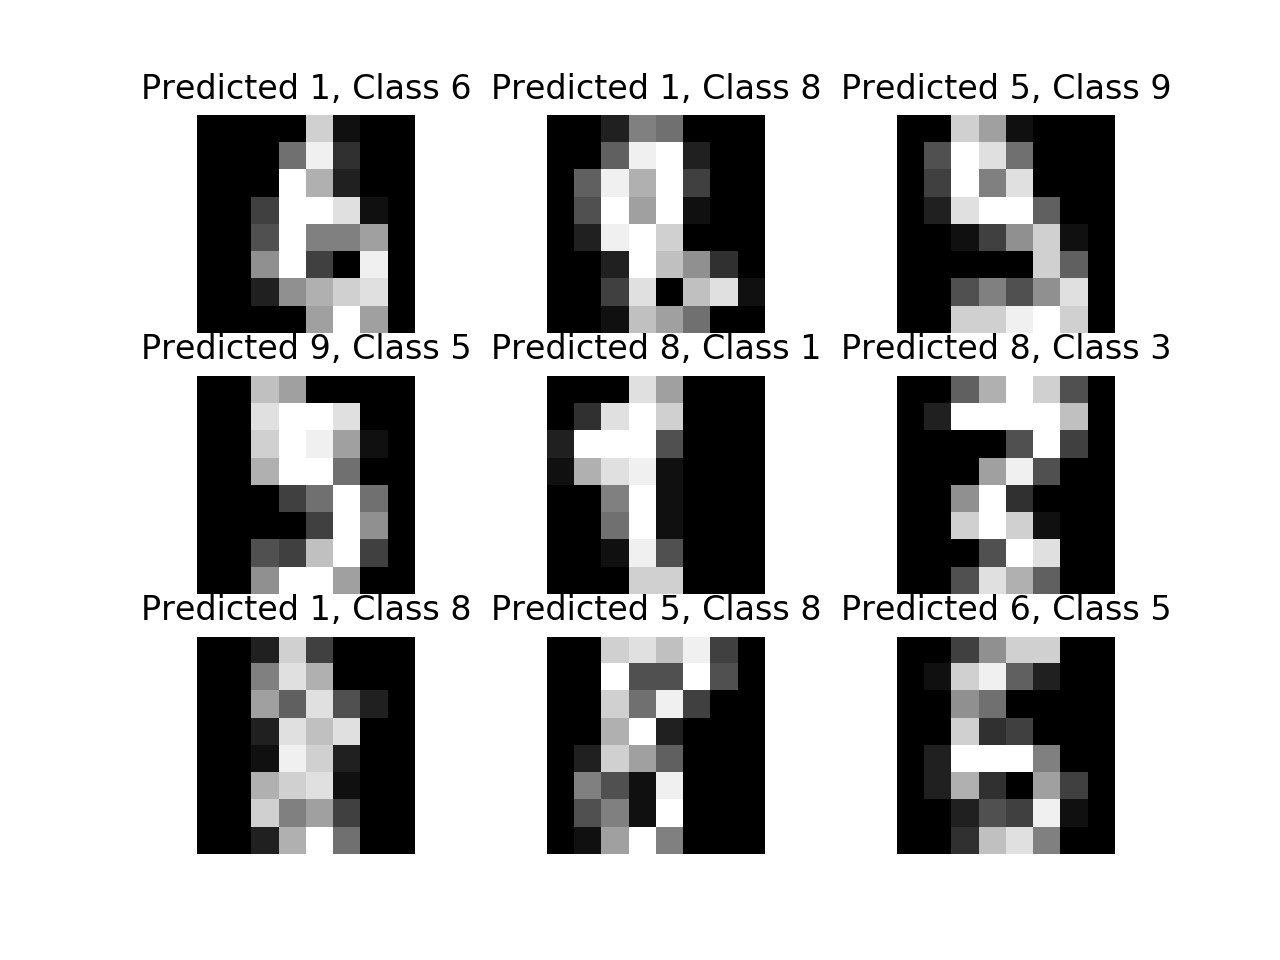

In [43]:
incorrect_indices = np.where(predicted_classes != y_test)[0]
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[incorrect].reshape(8, 8), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')